# ESCOLA POLITÉCNICA DA UNIVERSIDADE DE SÃO PAULO

## PQI 3403 Análise de Processos da Indústria Química 2021

### Case Study 2 - Classification

In [1]:
# Libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

# Separação do conjunto de dados
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix


## Question 1

In [2]:
# Importing dataset

url = 'https://raw.githubusercontent.com/vitorlavor/education/main/classification/red_wine_quality.csv'
df_wine = pd.read_csv(url, sep=';', header=0)
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


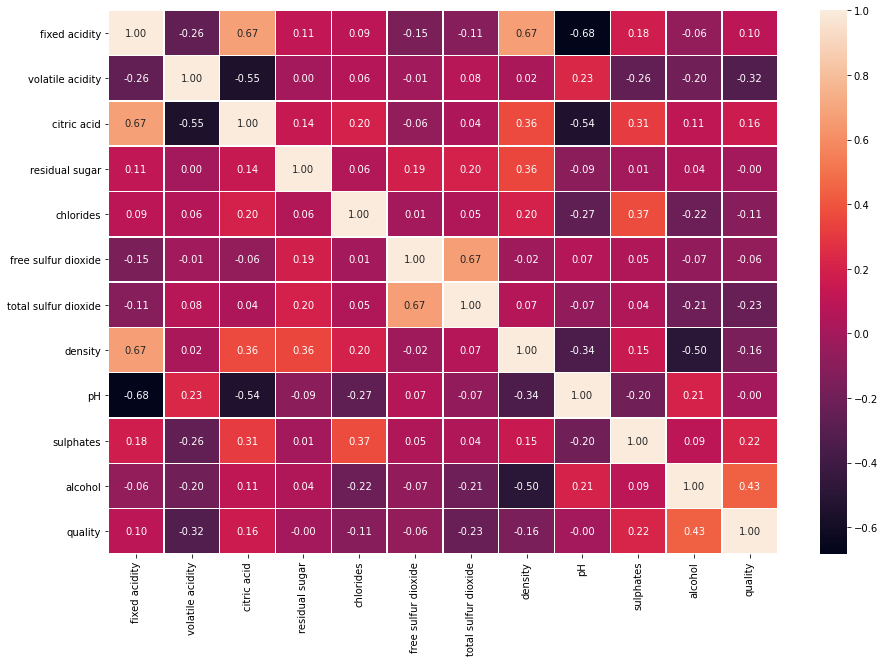

In [3]:
# Heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df_wine.corr() , annot = True, linewidths=.5, fmt = ".2f")

In [5]:
# Classification attribute (x) and target (Y)

x = df_wine.drop(columns = ["quality"])
y = df_wine["quality"]

In [6]:
# Train and test split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
# Models

classifier1 = LogisticRegression(max_iter=1000)
classifier1.fit(x_train,y_train)

classifier2 = neighbors.KNeighborsClassifier()
classifier2.fit(x_train,y_train)

classifier3 = DecisionTreeClassifier()
classifier3.fit(x_train,y_train)

classifier4 = svm.SVC()
classifier4.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
# Predictions

predictions1 = classifier1.predict(x_test)
predictions2 = classifier2.predict(x_test)
predictions3 = classifier3.predict(x_test)
predictions4 = classifier4.predict(x_test)

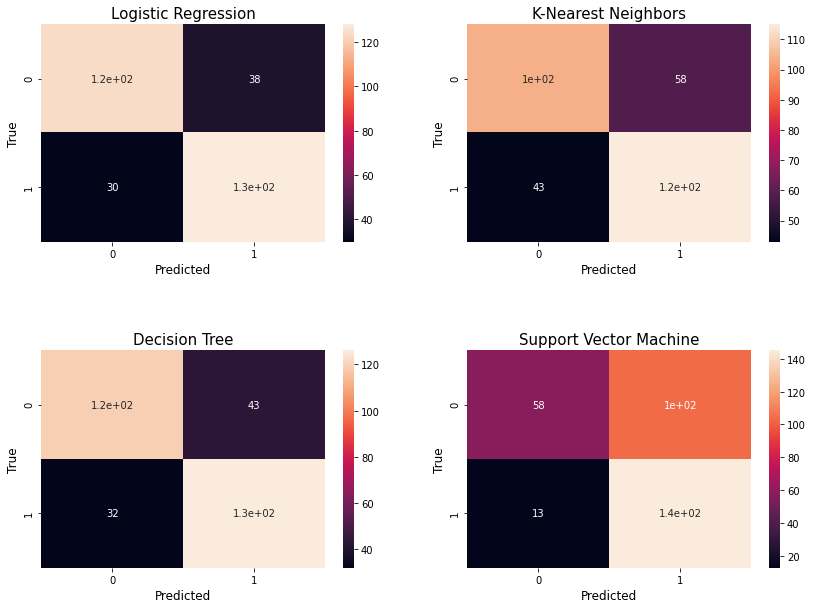

In [17]:
plt.figure(figsize = (14, 10))

plt.subplot(221) # Logistic Regression
ax = sns.heatmap(confusion_matrix(y_test, predictions1), annot=True)
ax = plt.title('Logistic Regression', fontsize = 15)
ax = plt.xlabel("Predicted", fontsize = 12)
ax = plt.ylabel("True", fontsize = 12)

plt.subplot(222) # KNN
ax = sns.heatmap(confusion_matrix(y_test, predictions2), annot=True)
ax = plt.title('K-Nearest Neighbors', fontsize = 15)
ax = plt.xlabel("Predicted", fontsize = 12)
ax = plt.ylabel("True", fontsize = 12)

plt.subplot(223) # Decision Tree
ax = sns.heatmap(confusion_matrix(y_test, predictions3), annot=True)
ax = plt.title('Decision Tree', fontsize = 15)
ax = plt.xlabel("Predicted", fontsize = 12)
ax = plt.ylabel("True", fontsize = 12)

plt.subplot(224) # Support Vector Machine
ax = sns.heatmap(confusion_matrix(y_test, predictions4), annot=True)
ax = plt.title('Support Vector Machine', fontsize = 15)
ax = plt.xlabel("Predicted", fontsize = 12)
ax = plt.ylabel("True", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

In [18]:
# Metrics 

# Logistic Regression

acc1 = accuracy_score(y_test,predictions1)
prec1 = precision_score(y_test,predictions1)
rec1 = recall_score(y_test,predictions1)
print('Logistic Regression metrics: \n Accuracy: {} \n Precision: {} \n Recall: {} \n'.format(round(acc1, 2), round(prec1, 2), round(rec1, 2)))

# KNN

acc2 = accuracy_score(y_test,predictions2)
prec2 = precision_score(y_test,predictions2)
rec2 = recall_score(y_test,predictions2)
print('KNN metrics: \n Accuracy: {} \n Precision: {} \n Recall: {}'.format(round(acc2, 2), round(prec2, 2), round(rec2, 2)))

# Decision Tree

acc1 = accuracy_score(y_test,predictions3)
prec1 = precision_score(y_test,predictions3)
rec1 = recall_score(y_test,predictions3)
print('Decision Tree metrics: \n Accuracy: {} \n Precision: {} \n Recall: {} \n'.format(round(acc1, 2), round(prec1, 2), round(rec1, 2)))

# Support Vector Machine

acc2 = accuracy_score(y_test,predictions4)
prec2 = precision_score(y_test,predictions4)
rec2 = recall_score(y_test,predictions4)
print('Support Vector Machine metrics: \n Accuracy: {} \n Precision: {} \n Recall: {}'.format(round(acc2, 2), round(prec2, 2), round(rec2, 2)))

Logistic Regression metrics: 
 Accuracy: 0.79 
 Precision: 0.77 
 Recall: 0.81 

KNN metrics: 
 Accuracy: 0.68 
 Precision: 0.66 
 Recall: 0.73
Decision Tree metrics: 
 Accuracy: 0.77 
 Precision: 0.75 
 Recall: 0.8 

Support Vector Machine metrics: 
 Accuracy: 0.63 
 Precision: 0.58 
 Recall: 0.92


In [19]:
list_kernels = ["linear", "poly", "rbf", "sigmoid"]

for function in list_kernels:
  classifier = svm.SVC(kernel = function)
  classifier.fit(x_train,y_train)
  predictions = classifier.predict(x_test)
  rec = recall_score(y_test,predictions)

  print(" Kernel: {}  -> Recall: {}".format(function, round(rec, 2)))

 Kernel: linear  -> Recall: 0.78
 Kernel: poly  -> Recall: 0.96
 Kernel: rbf  -> Recall: 0.92
 Kernel: sigmoid  -> Recall: 0.65


In [21]:
for n_neighbors in range(1,11):

  classifier = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors)
  classifier.fit(x_train,y_train)
  predictions = classifier.predict(x_test)
  prec = precision_score(y_test,predictions)

  print(" Neighnors: {}  -> Precision: {}".format(n_neighbors, round(prec, 2)))

 Neighnors: 1  -> Precision: 0.67
 Neighnors: 2  -> Precision: 0.75
 Neighnors: 3  -> Precision: 0.66
 Neighnors: 4  -> Precision: 0.7
 Neighnors: 5  -> Precision: 0.66
 Neighnors: 6  -> Precision: 0.72
 Neighnors: 7  -> Precision: 0.65
 Neighnors: 8  -> Precision: 0.68
 Neighnors: 9  -> Precision: 0.66
 Neighnors: 10  -> Precision: 0.69
